# TASK 2 : To Explore Supervised Machine Learning

In this regression task we're expected to predict the score of students based on the number of hours they study.

### Problem Statement : 

##### What will be the predicted score if a student study for 9.25 hours in a day ?


In [339]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
%matplotlib inline

#### Exploring the Data

In [340]:
#Reading the DataSet


url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print (df)
print("\nData has been successfully imported")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

Data has been successfully imported


In [341]:
# Size of the Data 
df.shape

(25, 2)

In [342]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [343]:
# Identifying the Data Types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [344]:
# Checking for the missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [345]:
# Summary of the Data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the Distribution

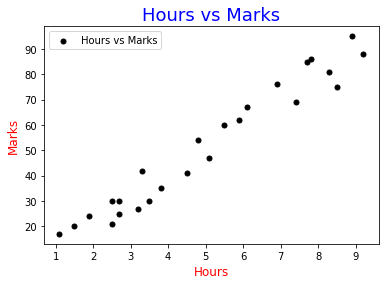

In [346]:
plt.scatter(df.Hours,df.Scores,color="black",s=100,label="Hours vs Marks",marker=".")
plt.xlabel('Hours', color = 'red',fontsize=12)
plt.ylabel('Marks', color = 'red',fontsize=12)
plt.title('Hours vs Marks', color = 'blue',fontsize=18)
plt.legend()
plt.show()

##### The above plot clearly depicts that there is a positive linear relation between both the variables.

In [347]:
# Correlation Matrix
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Data Preparation

In [348]:
# Seperating the independent (x) & dependent (y) variables or attributes and labels
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [349]:
print(x) 

print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [350]:
# Splitting the Data into Training & Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

#### Training the Algo

In [351]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print("Trained")

Trained


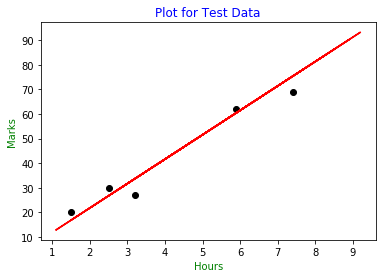

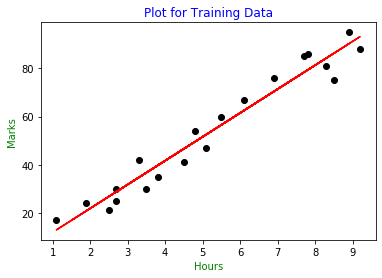

In [352]:
# Regression Line
line = regressor.coef_*x+regressor.intercept_

# Plot for test data
plt.scatter(x_test, y_test, color = 'black')
plt.plot(x, line, color = 'red');
plt.xlabel("Hours", color = 'green')
plt.ylabel("Marks", color = 'green')
plt.title("Plot for Test Data", color = 'blue')
plt.show()

# Plot fot training data
plt.scatter(x_train, y_train, color = 'black')
plt.plot(x, line, color = 'red');
plt.xlabel("Hours", color = 'green')
plt.ylabel("Marks", color = 'green')
plt.title("Plot for Training Data", color = 'blue')
plt.show()



In [353]:
print(regressor.coef_)

[9.91065648]


In [354]:
print(regressor.intercept_)

2.018160041434683


#### Prediction

In [355]:
# Prediction
y_pred = regressor.predict(x_test)

In [356]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [357]:
#Actual Vs Predicted Score

df0 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [358]:
df0

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


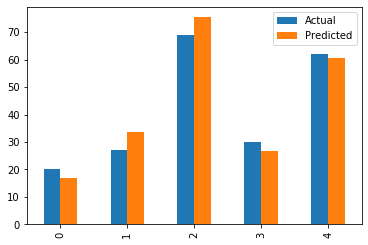

In [359]:
df0.plot(kind = 'bar')

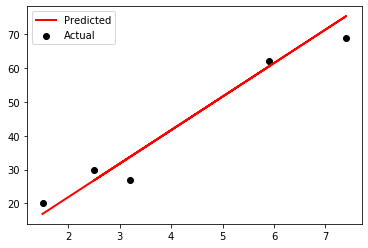

In [360]:
plt.scatter(x = x_test,y = y_test, color = 'black')
plt.plot(x_test,y_pred, color = "red", linewidth = 2)
plt.legend(['Predicted','Actual'])

#### Evaluation Metrics

In [361]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


#### Accuracy of the Model

In [362]:
metrics.r2_score(y_test,y_pred)

0.9454906892105356

#### Predicting the Score

In [363]:
study_hour=9.25
Prediction_score=regressor.predict([[study_hour]]).round(2)
print('Predicted score if a student study for 9.25 hours in a day :',Prediction_score)

Predicted score if a student study for 9.25 hours in a day : [93.69]


### OUTCOMES:

#### >>> Mean score of the students : 51.48

#### >>> Minimum and Maximum marks : 17.00 & 95.00

#### >>> Deviation in Marks (SD) : 25.286

#### >>> Regression Intercept and Coefficient : 2.01 & 9.91

#### >>> Predicted Score of the student if he study for 9.25 hour : 93.69

#### >>> Accuracy of the Model (Linear Regression) : 0.945
